# Clustering using PCA & mapping with original clusters

## Problem Statement | TASK

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve)) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
rawData = pd.read_csv('wine.csv')
rawData

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

On the first glimpse it appears that the features of the dataframe above show the contents of wine and the first column shows possibaly there are there catagories or lables of the wine for analysis. 

All columns are measured in different scales. currently we do not have information of each feature and their measurement and their contribution in makeing wine. and their appropriate quantities for making it a ideal wine.

As our objective here is to check if after applying PCA whther we will get the same catagories or not. we shall only do our basic data analysis which is appropriate to understand the data.

# EDA

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


There are 178 entries and 14 features of which 1 feature 'Type' is a classification catagory. The means we shall have 13 remaining columns to do our analysis.

None of the columns/features have null values. all columns are numeric values. and on first glimpse the values make sense hence there is no need to change the type of any feature/column

In [4]:
# check for normalcy, range, scale of the data
rawData.describe(percentiles=[.1,.25,.75,.9]).T

count        mean         std     min      10%       25%  \
Type             178.0    1.938202    0.775035    1.00    1.000    1.0000   
Alcohol          178.0   13.000618    0.811827   11.03   11.933   12.3625   
Malic            178.0    2.336348    1.117146    0.74    1.247    1.6025   
Ash              178.0    2.366517    0.274344    1.36    2.000    2.2100   
Alcalinity       178.0   19.494944    3.339564   10.60   16.000   17.2000   
Magnesium        178.0   99.741573   14.282484   70.00   85.000   88.0000   
Phenols          178.0    2.295112    0.625851    0.98    1.471    1.7425   
Flavanoids       178.0    2.029270    0.998859    0.34    0.607    1.2050   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.217    0.2700   
Proanthocyanins  178.0    1.590899    0.572359    0.41    0.854    1.2500   
Color            178.0    5.058090    2.318286    1.28    2.549    3.2200   
Hue              178.0    0.957449    0.228572    0.48    0.610    0.7825   
Dilution         178.0    2.611685    0.709990    1.27    1.580    1.9375   
Proline          178.0  746.893258  314.907474  278.00  406.700  500.5000   

                     50%       75%       90%      max  
Type               2.000    3.0000     3.000     3.00  
Alcohol           13.050   13.6775    14.100    14.83  
Malic              1.865    3.0825     3.983     5.80  
Ash                2.360    2.5575     2.700     3.23  
Alcalinity        19.500   21.5000    24.000    30.00  
Magnesium         98.000  107.0000   118.000   162.00  
Phenols            2.355    2.8000     3.044     3.88  
Flavanoids         2.135    2.8750     3.233     5.08  
Nonflavanoids      0.340    0.4375     0.530     0.66  
Proanthocyanins    1.555    1.9500     2.305     3.58  
Color              4.690    6.2000     8.530    13.00  
Hue                0.965    1.1200     1.233     1.71  
Dilution           2.780    3.1700     3.456     4.00  
Proline          673.500  985.0000  1261.500  1680.00

Suspects of skewness = 'Malic', 'Proline' (both 'Malic' and 'Proline' have outliers on the right as there is a huge gap in 90th percentile and max value)

Normal or near normal distributions = 'Alcohol','Ash','Alcalinity','Magnesium','phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution'

However, Distributions do not matter so much in PCA

## Checking the Characters of Three classes / clusters

In [5]:
rawData.groupby('Type').mean().T

Type                       1           2           3
Alcohol            13.744746   12.278732   13.153750
Malic               2.010678    1.932676    3.333750
Ash                 2.455593    2.244789    2.437083
Alcalinity         17.037288   20.238028   21.416667
Magnesium         106.338983   94.549296   99.312500
Phenols             2.840169    2.258873    1.678750
Flavanoids          2.982373    2.080845    0.781458
Nonflavanoids       0.290000    0.363662    0.447500
Proanthocyanins     1.899322    1.630282    1.153542
Color               5.528305    3.086620    7.396250
Hue                 1.062034    1.056282    0.682708
Dilution            3.157797    2.785352    1.683542
Proline          1115.711864  519.507042  629.895833

In [6]:
rawData.groupby('Type').median().T

Type                   1       2        3
Alcohol            13.75   12.29   13.165
Malic               1.77    1.61    3.265
Ash                 2.44    2.24    2.380
Alcalinity         16.80   20.00   21.000
Magnesium         104.00   88.00   97.000
Phenols             2.80    2.20    1.635
Flavanoids          2.98    2.03    0.685
Nonflavanoids       0.29    0.37    0.470
Proanthocyanins     1.87    1.61    1.105
Color               5.40    2.90    7.550
Hue                 1.07    1.04    0.665
Dilution            3.17    2.83    1.660
Proline          1095.00  495.00  627.500

looking at the mean and median charecters of thress groups, we can infer that proline, dilution, color, flavanoids, magnesium, phenols have more distinct values than other feature. This varience is going to help us identifiy the clusters more prominently than other features with less varience.

**let us try to visualize the clusters**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## Multivariate analysis using Pairplot

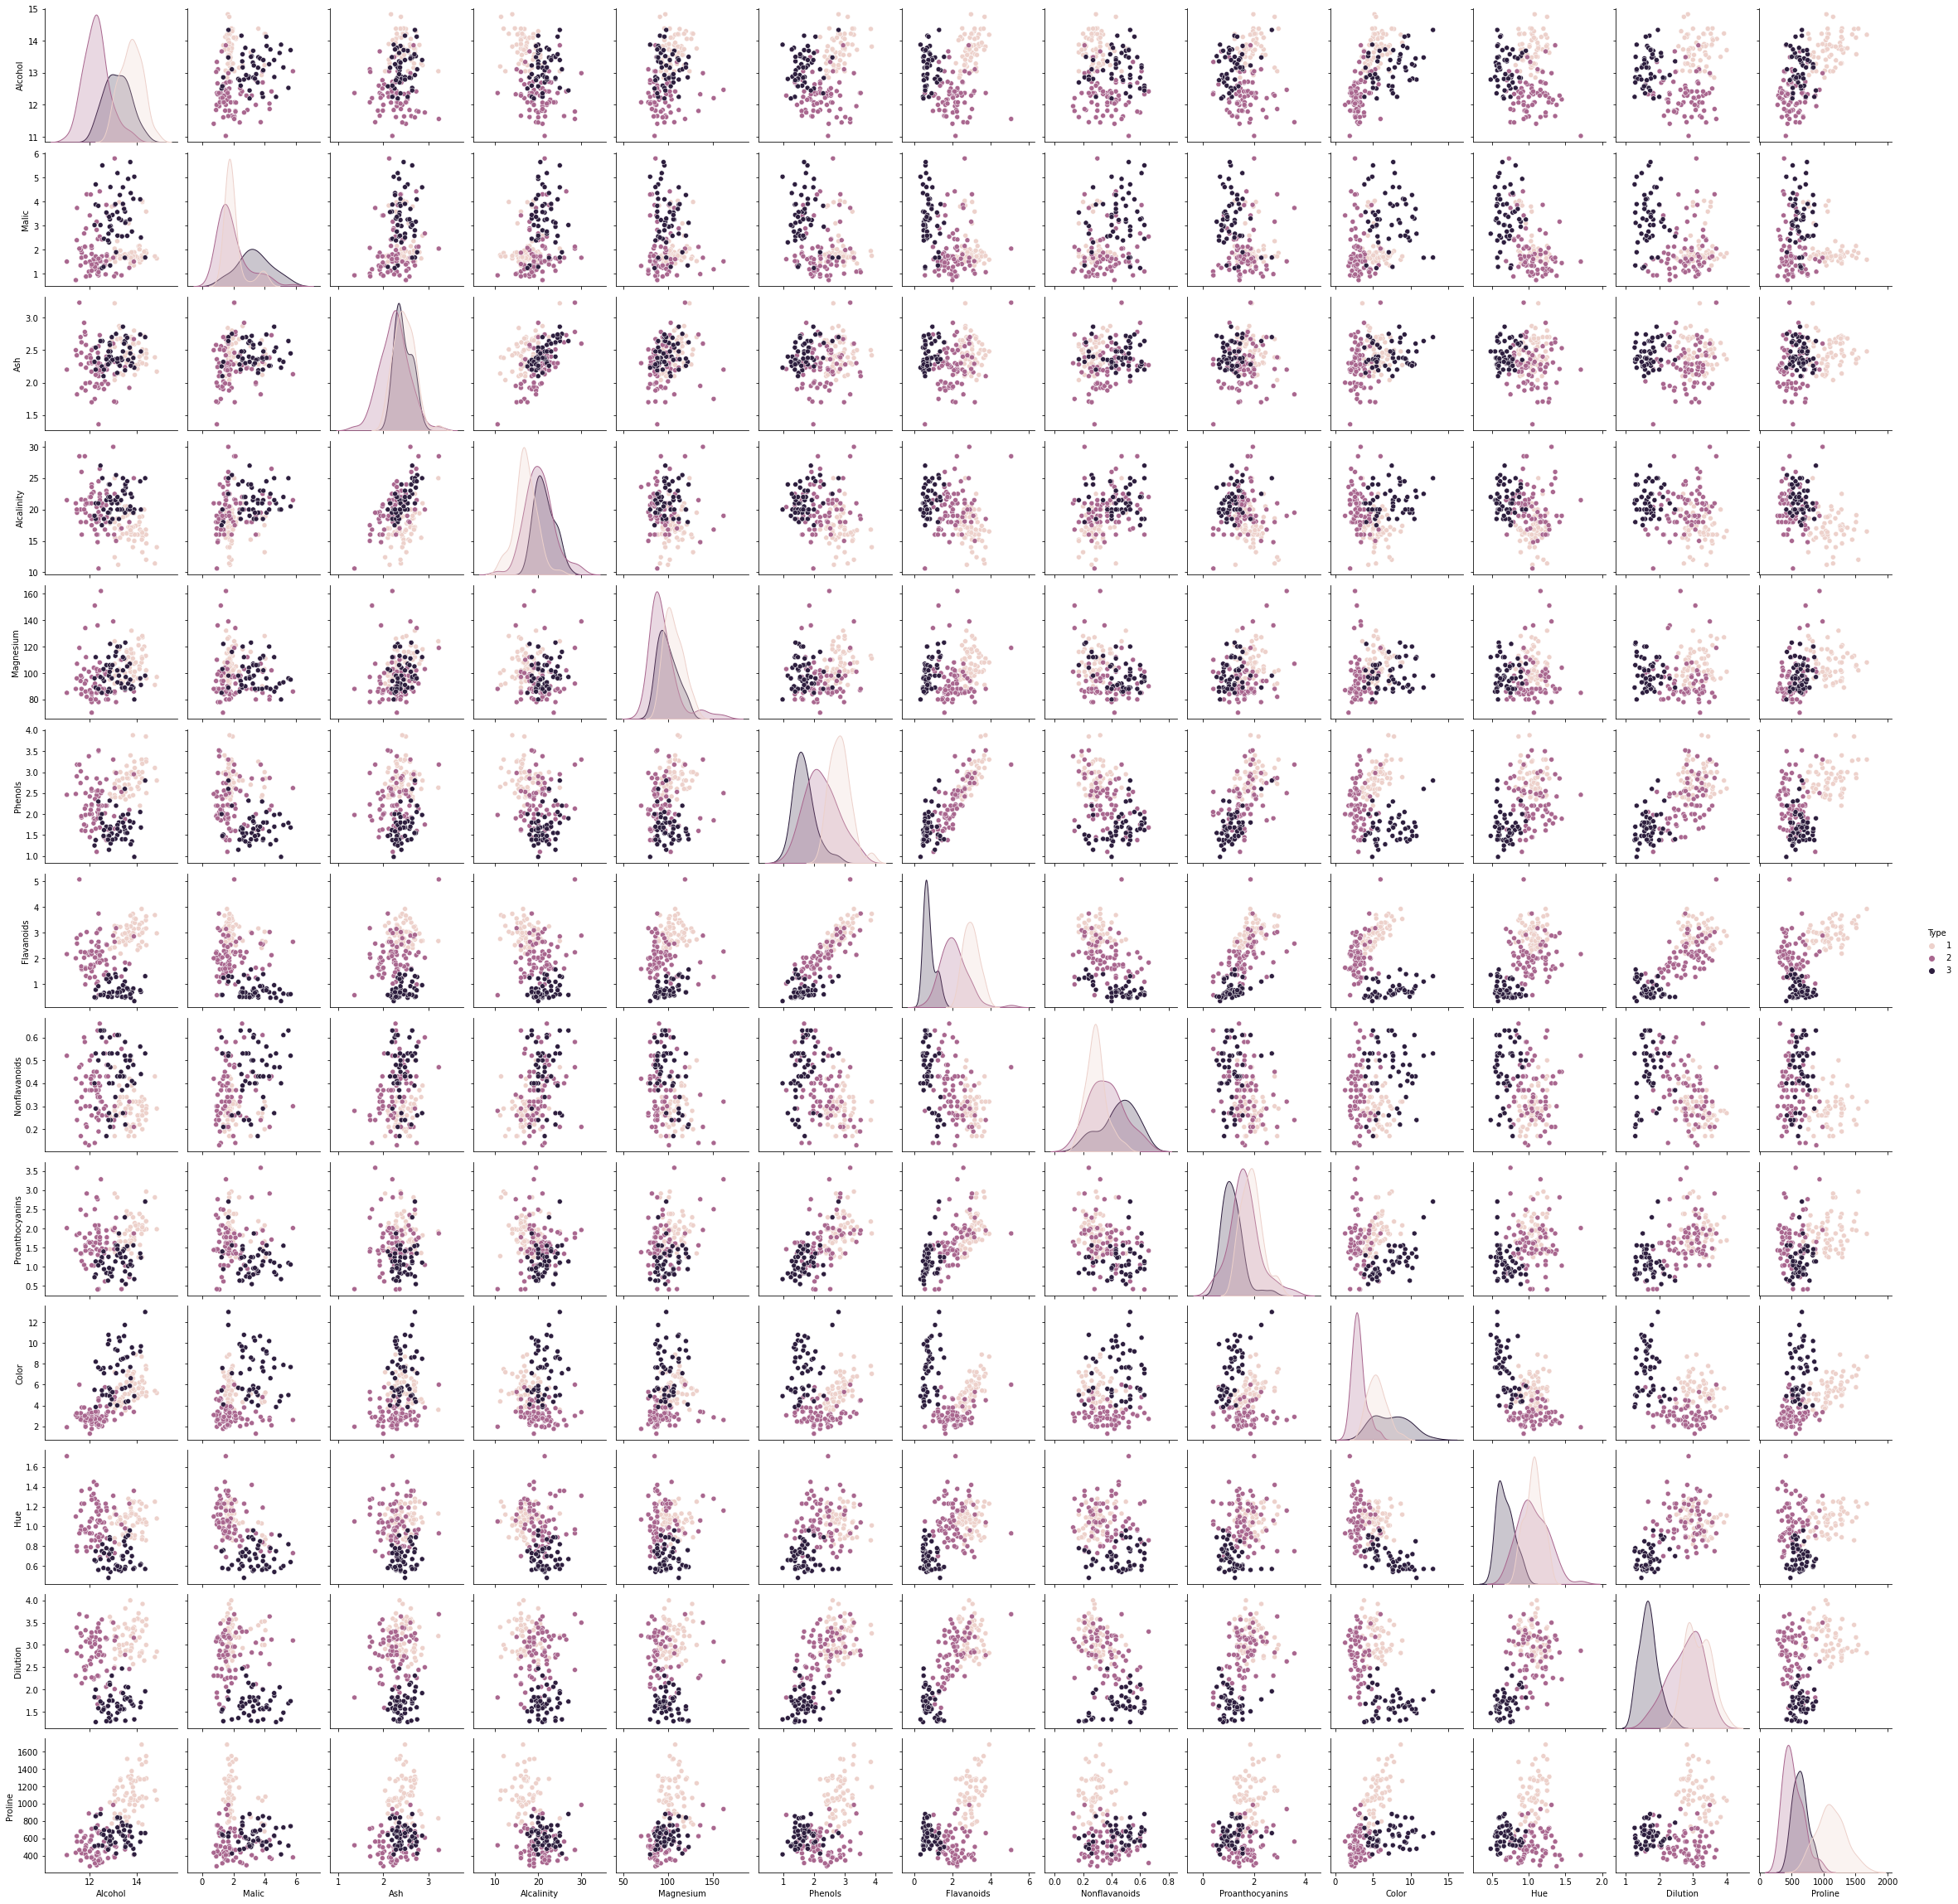

In [8]:
sns.pairplot(rawData,hue='Type')
plt.show()

### KDE plots for each feature

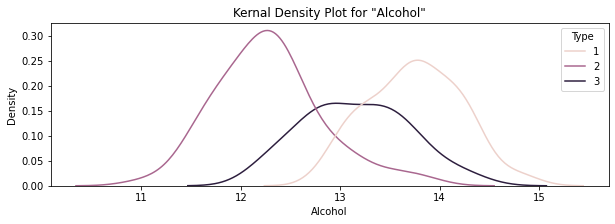

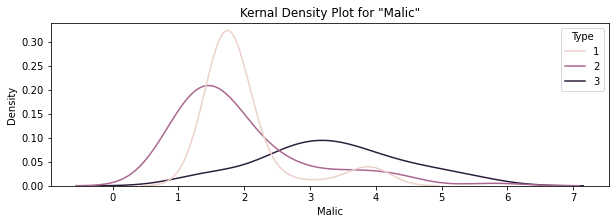

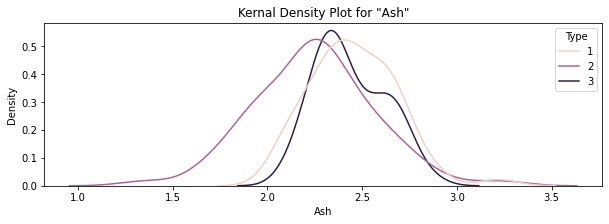

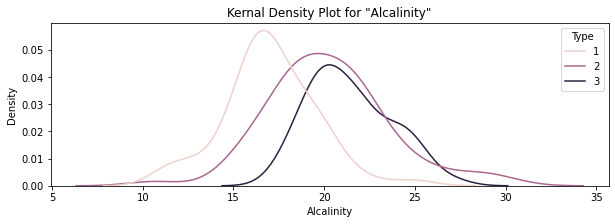

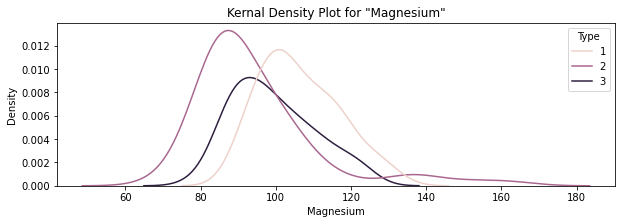

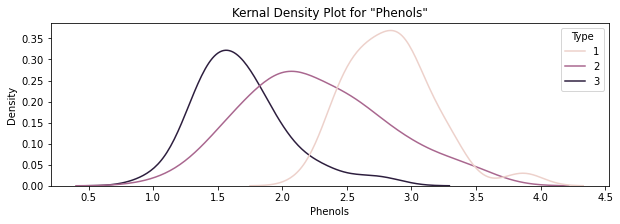

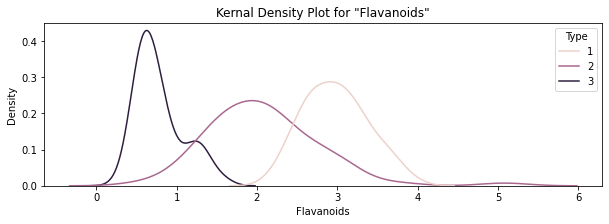

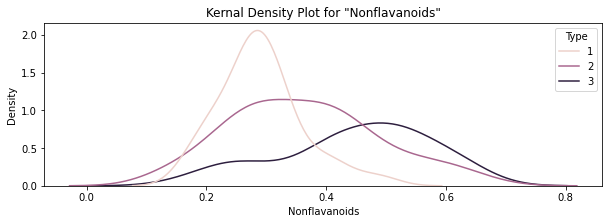

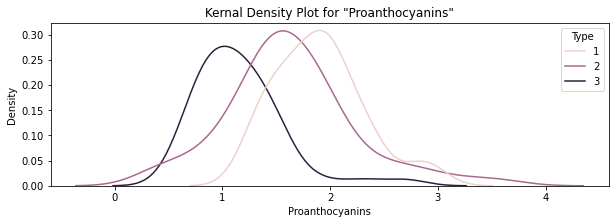

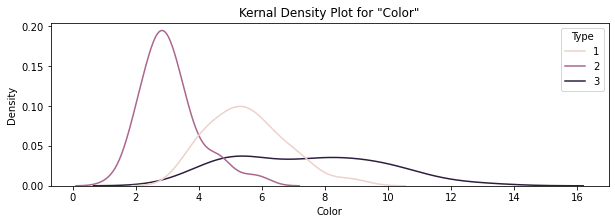

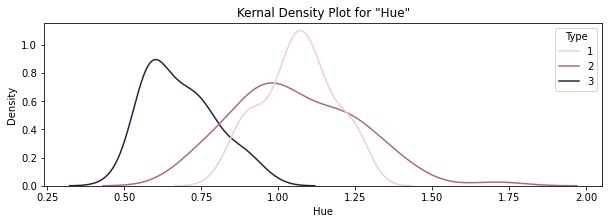

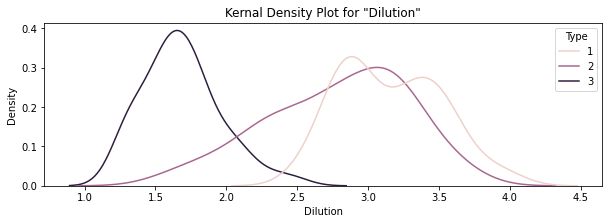

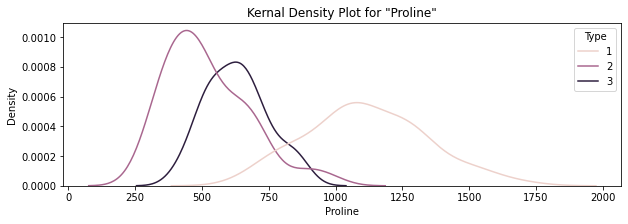

In [9]:
for x in rawData.columns[1:]:
    fig,ax = plt.subplots(1,1,figsize = (10,3))
    sns.kdeplot(x = rawData[x], hue = rawData.Type)
    plt.title(f'Kernal Density Plot for "{x}"')
    plt.show

**if we closely observe the pair plots especially the full pair plots. we can see that proline in combination with Dilution, Color, Flavnoids is helping us to identify the clusters properly.**

### Verifying with individual scatter plots in combination with 'Proline'

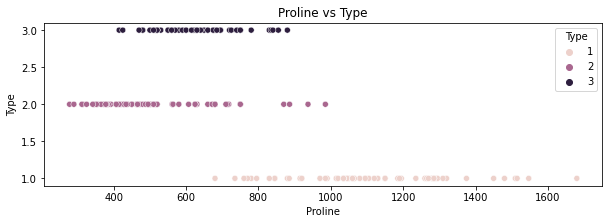

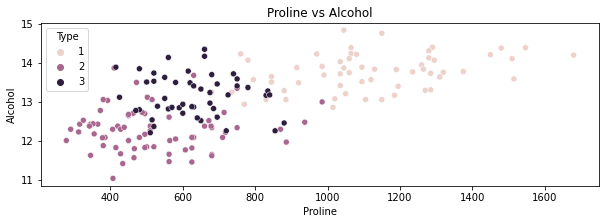

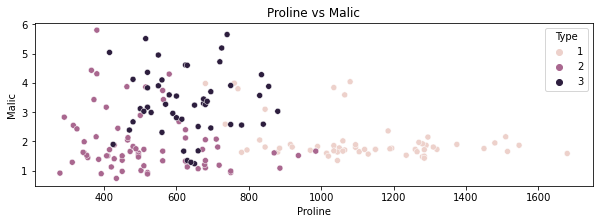

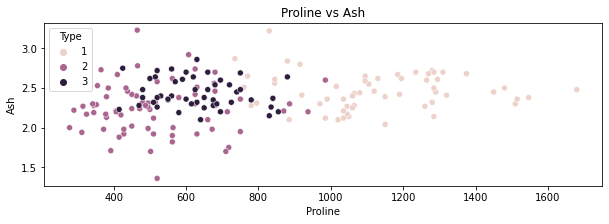

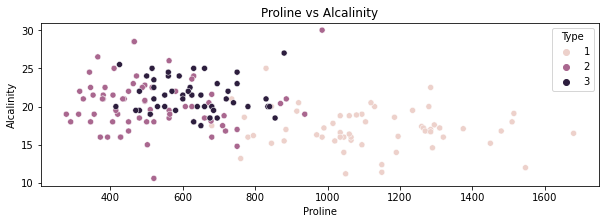

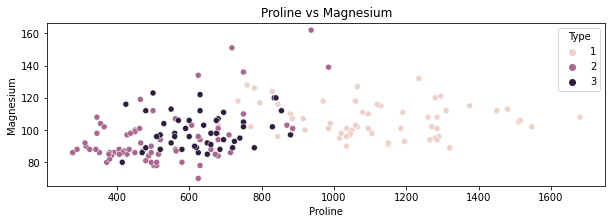

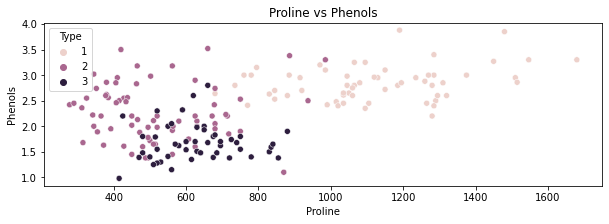

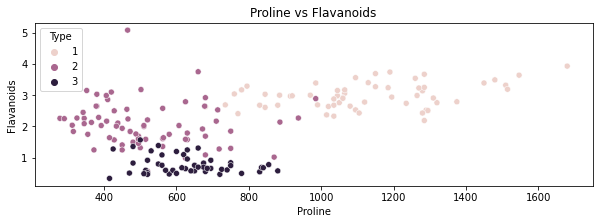

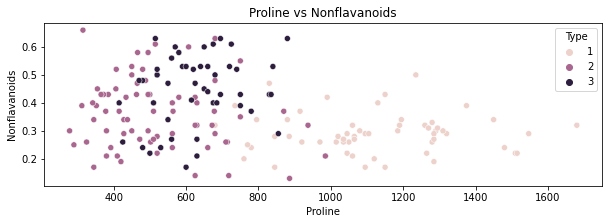

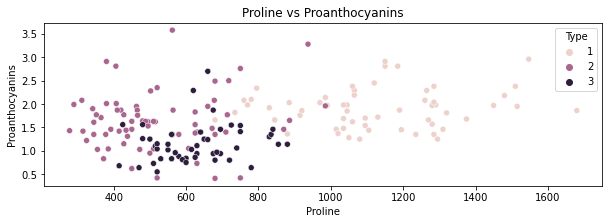

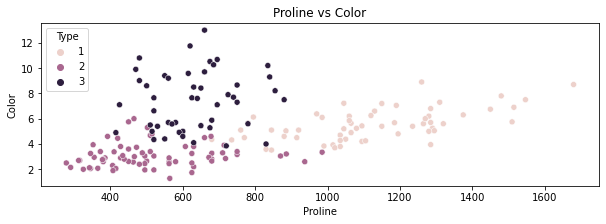

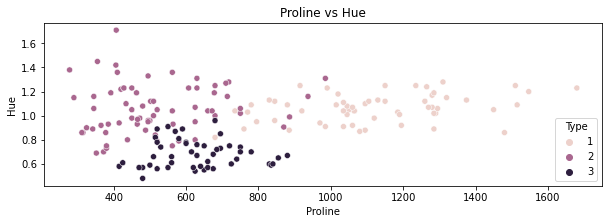

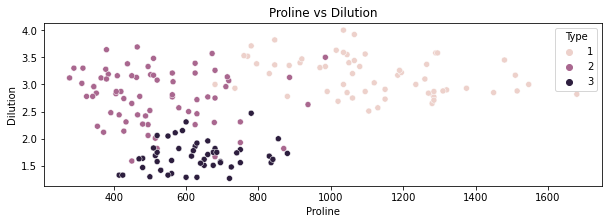

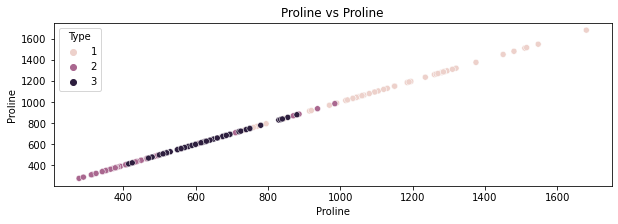

In [10]:
for i in rawData.columns:
    plt.figure(figsize=(10,3))
    sns.scatterplot(x=rawData.Proline,y=rawData[i],hue=rawData['Type'])
    plt.title(f'Proline vs {i}')
    plt.show()

**Dilution,Hue,Color,Flavnoids,phenols in combination with Proline are helping us to see different clusters clearly.**

# PCA
    
    As it is very difficult identify clusters with bivariate and multivariate analysis. In fact, we are doing multivariate analysis in pair plot meaning we are compare each feature with other feature to check if that explains the clusters. It is very difficult to plot these 13 features into 13 * 13 dimension plot. 
    
    Also it is computationally expensive to run a clustering algorithm with large dataset. further we are not sure if all the attributes are contributing in identifying the clusters. even if they are contributing is the contribution is significant??
    
    Hence, PCA will help us reduce the dimensions and visualize the data 2 dimension.

In [11]:
# Import libraries for scaling and PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

## Normalizing the data and shifting the mean to 0

In [12]:
normData = scale(rawData.iloc[:,1:])
normData

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Initialize, Fit and Transform the Data using PCA Algorithm

In [13]:
pca = PCA()

pca_vals = pca.fit_transform(normData)

pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Plotting the PCA-wise or Component-wise Explained variance & the cumulative Explained Variance

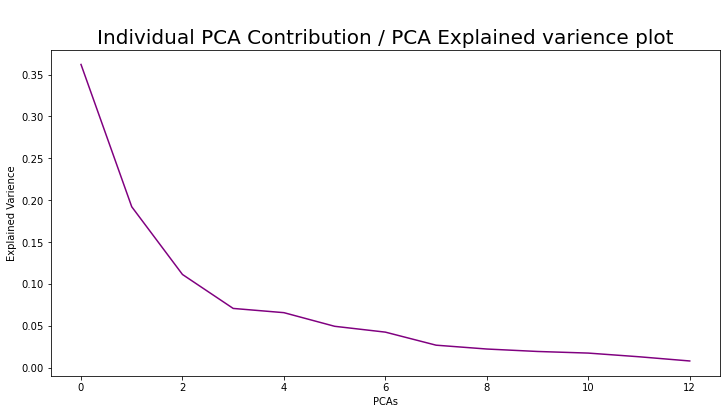


** Ratio of information Captured by each Principle Analysis Component (PCA)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


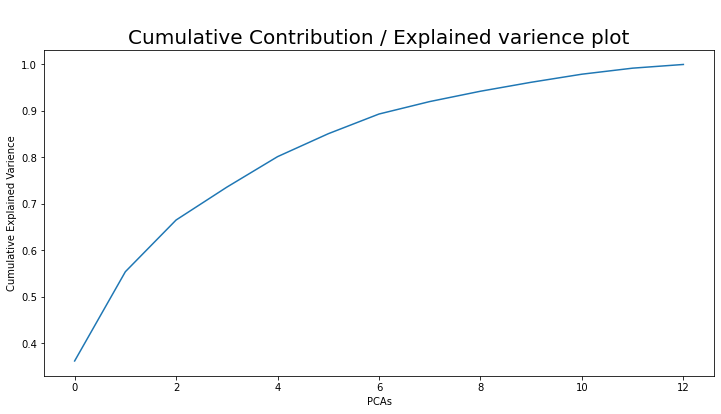


** Cumulative Ratio of information Captured by consecutive PCAs

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [14]:
# Plotting the PCA-wise or Component-wise Explained variance
plt.figure(figsize=(12,6))
plt.plot(pca.explained_variance_ratio_,color='purple')
plt.title('\nIndividual PCA Contribution / PCA Explained varience plot', fontsize = 20)
plt.xlabel('PCAs')
plt.ylabel('Explained Varience')
plt.show()
print('\n** \033[7mRatio of information Captured by each Principle Analysis Component (PCA)\033[0m\n')
print(pca.explained_variance_ratio_)

# Plotting the cumulative Explained Variance
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('\nCumulative Contribution / Explained varience plot',fontsize = 20)
plt.xlabel('PCAs')
plt.ylabel('Cumulative Explained Varience')
plt.show()
print('\n** \033[7mCumulative Ratio of information Captured by consecutive PCAs\033[0m\n')
print(np.cumsum(pca.explained_variance_ratio_))

In The above two plots show the Explained Variance of each PCA and Cumulative Explained Variance for Consecutive PCAs. In the First one we can note the diminishing contribution of each PCA. 

As such the first plot suggests that 3 PCA are the best after that the rate contribution is almost flat. if we look at the Cumulative Contribution plot or Cumulative Explained Variance plot. we can see the the total explained variance for two PCAs is close to 56% and for three PCAs it is 66%. 

**I am not sure if it is good. However, as long as it helps us identify our clusters independently it should be good enough. let us see.**

### Plotting the PCA data in Two Dimension plot

<function matplotlib.pyplot.show(close=None, block=None)>

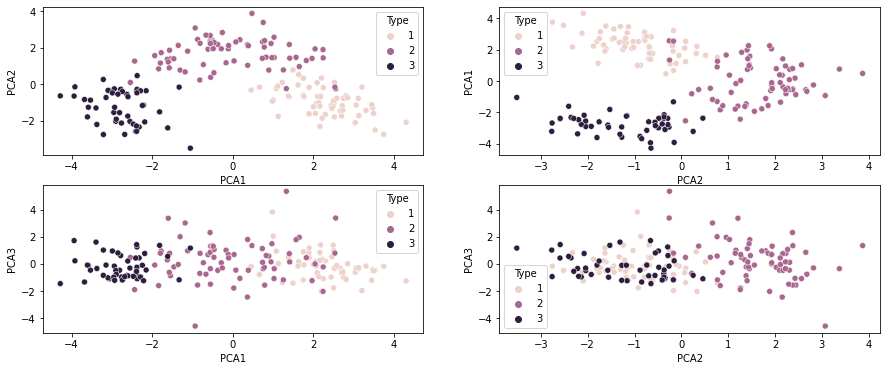

In [15]:
x = pd.Series(pca_vals[:,0],name='PCA1')
y = pd.Series(pca_vals[:,1],name='PCA2')
z = pd.Series(pca_vals[:,2],name='PCA3')
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot(x=x,y=y,hue=rawData.Type)
# plt.show()
plt.subplot(2,2,2)
sns.scatterplot(x = y, y = x, hue = rawData.Type)
# plt.show()
plt.subplot(2,2,3)
sns.scatterplot(x = x, y = z, hue = rawData.Type)
plt.subplot(2,2,4)
sns.scatterplot(x = y, y = z, hue = rawData.Type)
plt.show

*We could have never plotted the above plots with the original data, With the help of PCA we successfully reduced the dimensions from 13 to just 3 and easily visualize the data in 2 dimension plots.*

## Making a Dataframe with 3 PCAs for Clustering algorithms

In [16]:
data = zip(rawData.Type,x,y,z)
pca_data = pd.DataFrame(data,columns=['Type','PCA1','PCA2','PCA3'])

# Hirarchical and Kmeans Clustering, using 3 PCAs for ideal number of Clusters

In [17]:
data = pca_data.iloc[:,1:]
data

PCA1      PCA2      PCA3
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]

**There is no need to scale the data as it is already scaled before the applying PCA.**

## Hirarchical Clustering

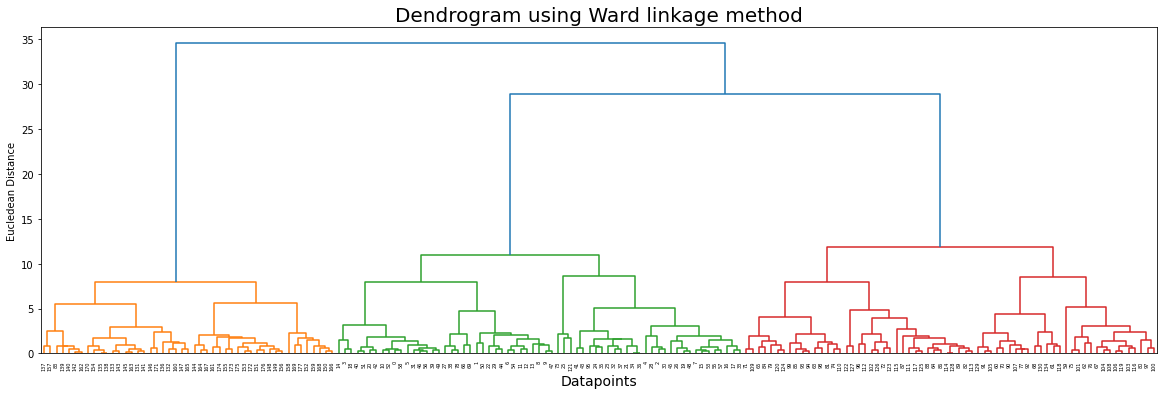

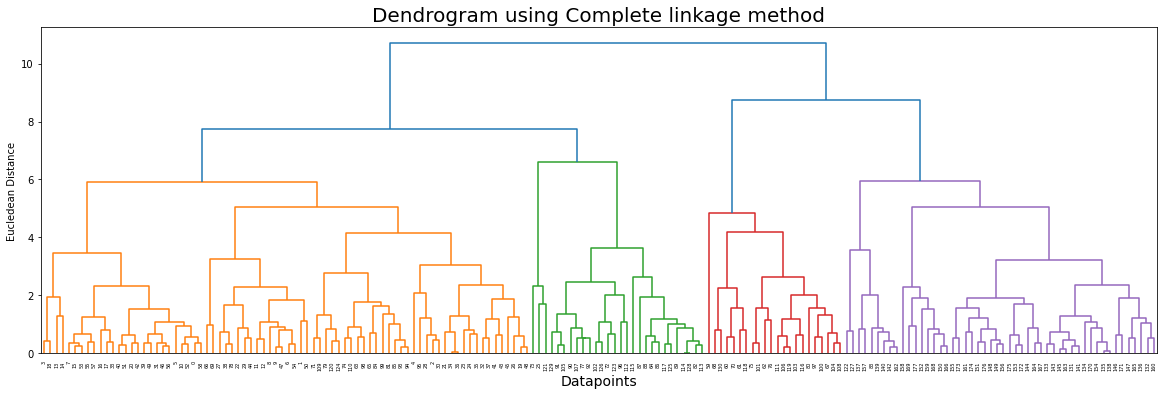

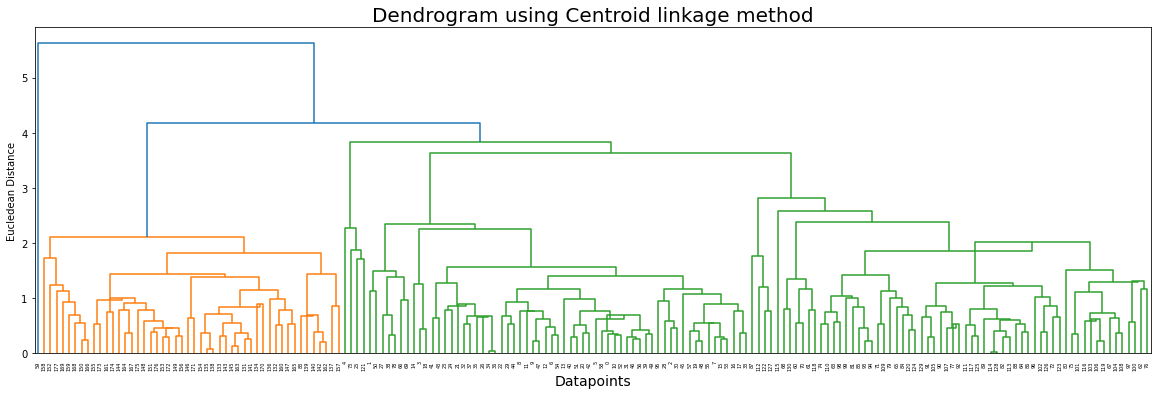

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# plotting dendogram using Ward method
fig,ax = plt.subplots(1,1,figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(data,metric='euclidean',method="ward"), ax=ax)
plt.title('Dendrogram using Ward linkage method', fontsize = 20)
plt.xlabel('Datapoints',fontsize = 14)
plt.ylabel('Eucledean Distance')
plt.show()

# plotting dendogram using Complete linkage method
fig,ax = plt.subplots(1,1,figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(data,method='complete',metric='euclidean'))
plt.title('Dendrogram using Complete linkage method', fontsize = 20)
plt.xlabel('Datapoints',fontsize = 14)
plt.ylabel('Eucledean Distance')
plt.show()

# plotting dendogram using centroid linkage method
fig,ax = plt.subplots(1,1,figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(data,method='centroid',metric='euclidean'))
plt.title('Dendrogram using Centroid linkage method', fontsize = 20)
plt.xlabel('Datapoints',fontsize = 14)
plt.ylabel('Eucledean Distance')
plt.show()

***Ward method is giving us the optimul and equal distribution of records under 3 cluster. hence we shall use 3 clusters under hirarchical method.***

### Initiating, Training and Predicting the Hirarchical Clustering class object

In [19]:
# Initializing the class object
hcl = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

# Fitting and predicing the clusters
hclid = pd.DataFrame(hcl.fit_predict(data),columns=['hclust_ID'])
hclid

# Adding the cluster ids / labels to the original dataframe
hclData = pd.concat([hclid,pca_data.loc[:,'Type'],data],axis=1)
print('\n\n**\033[7mPCA DATA WITH "hclust_ID"\033[0m**')
print('  -------------------------')
hclData



**PCA DATA WITH "hclust_ID"**
  -------------------------


hclust_ID  Type      PCA1      PCA2      PCA3
0            2     1  3.316751 -1.443463 -0.165739
1            2     1  2.209465  0.333393 -2.026457
2            2     1  2.516740 -1.031151  0.982819
3            2     1  3.757066 -2.756372 -0.176192
4            2     1  1.008908 -0.869831  2.026688
..         ...   ...       ...       ...       ...
173          1     3 -3.370524 -2.216289 -0.342570
174          1     3 -2.601956 -1.757229  0.207581
175          1     3 -2.677839 -2.760899 -0.940942
176          1     3 -2.387017 -2.297347 -0.550696
177          1     3 -3.208758 -2.768920  1.013914

[178 rows x 5 columns]

### Mapping the pridicted hclust_IDs to the original Type classes

In [20]:
# mapping hclust_ID number 1 to Type 3.
hclData.hclust_ID.replace(to_replace=1,value=3,inplace=True)

# mapping hclust_ID number 2 to Type 1.
hclData.hclust_ID.replace(to_replace=2,value=1,inplace=True)

# mapping hclust_ID number 0 to Type 2.
hclData.hclust_ID.replace(to_replace=0,value=2,inplace=True)

print('\n** \033[7m Mapped Data Grouped by Original Clusters and Sub-Grouped by Predicted Clusters\033[0m')
hclData.groupby(['Type','hclust_ID']).count()


**  Mapped Data Grouped by Original Clusters and Sub-Grouped by Predicted Clusters


PCA1  PCA2  PCA3
Type hclust_ID                  
1    1            59    59    59
2    1             6     6     6
     2            64    64    64
     3             1     1     1
3    2             2     2     2
     3            46    46    46

### Checking the erronious classification using Countplot

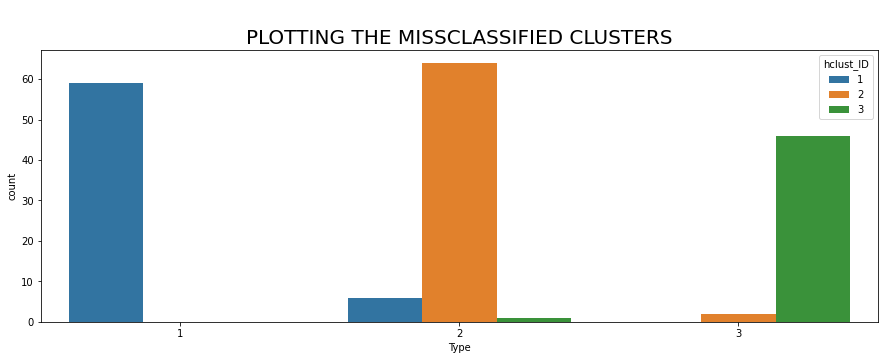

THE MISS-CLASSIFIED CLUSTERS
--------------------------


hclust_ID  Type      PCA1      PCA2      PCA3
66           1     2  2.248507  1.884592 -2.031840
69           1     2  1.975620  1.403283 -1.238276
73           1     2  2.562227 -0.260199  3.374394
78           1     2  1.262931  0.770850 -1.184225
83           3     2 -2.538977  0.087443  0.474251
95           1     2  2.543865 -0.169274  0.788697
121          1     2  1.336322 -0.253337  5.345388
130          2     3 -1.327102 -0.170389 -1.180013
134          2     3 -2.369869  0.459635 -1.101400

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x = hclData.Type, hue = hclData.hclust_ID)
plt.title('\nPLOTTING THE MISSCLASSIFIED CLUSTERS', fontsize = 20)
plt.show()
print('\033[7mTHE MISS-CLASSIFIED CLUSTERS\033[0m')
print('--------------------------')
hclData[hclData.hclust_ID-hclData.Type != 0]

**As we can see from the 'countplot' cluster 1 is correctly predicted, whereas there are some data-points are wrongly predicted in cluster 2 & 3.**

**Total nine data-points are wrongly clustered by the 'Hirarchical Clustering'. but the optimum clusters is still 3. It is same as original clusters or classifications.**

# Kmeans Clustering

### Elbow curve Checking the ideal number of clusters

C:\Users\MMM-SM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


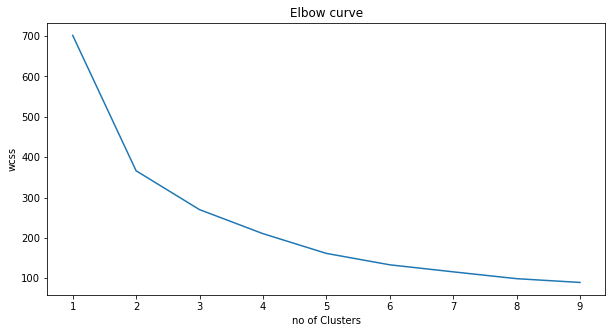


 Within Cluster Sum of Squares 

[701.8621351560124, 366.30888189963645, 270.0492219716163, 210.54123972357888, 161.61566448615437, 133.30338805560606, 115.90660620841425, 98.97302586065238, 89.6101378803459]


In [22]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kc = KMeans(n_clusters=i,random_state=0)
    kc.fit(data.iloc[:,1:])
    wcss.append(kc.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,10),wcss)
plt.title('Elbow curve')
plt.xlabel('no of Clusters')
plt.ylabel('wcss')
plt.show()
print('\n \033[7mWithin Cluster Sum of Squares\033[0m \n')
print(wcss)

**There is no clear elbow in the plot above. The "Rate of Decrease" in `"Within Cluster Sum of Squared"` is the highest from 1 to 2 clusters but from 2 to 3 and 3 to 4 the 'Rate of Decrease' is same. 2 clusters are no good for forming clusters, Hence we will make three clusters.**

## KMeans Clustering using 3 PCAs

In [23]:
# Import KMeans algorithm from Sklearn library
from sklearn.cluster import KMeans

# Initialize the alogorithm with relevant parameteres
kcl = KMeans(n_clusters=3,random_state=0)

# predict the clusters and stave in the object
kclid = pd.DataFrame(kcl.fit_predict(pca_data),columns=['kclustID'])
# kclid

# Concat / join the predicted clusters with the PCA data
finalData = pd.concat([kclid,pca_data],axis=1)
finalData

kclustID  Type      PCA1      PCA2      PCA3
0           1     1  3.316751 -1.443463 -0.165739
1           1     1  2.209465  0.333393 -2.026457
2           1     1  2.516740 -1.031151  0.982819
3           1     1  3.757066 -2.756372 -0.176192
4           1     1  1.008908 -0.869831  2.026688
..        ...   ...       ...       ...       ...
173         0     3 -3.370524 -2.216289 -0.342570
174         0     3 -2.601956 -1.757229  0.207581
175         0     3 -2.677839 -2.760899 -0.940942
176         0     3 -2.387017 -2.297347 -0.550696
177         0     3 -3.208758 -2.768920  1.013914

[178 rows x 5 columns]

In [24]:
# mapping the kclustid to type, the 0 of kclustid is same as 3 in type column. 
# 1 & 2 have been classified as 1 & 2 in both columns

finalData.kclustID.replace(to_replace=0,value=3,inplace=True)
finalData

kclustID  Type      PCA1      PCA2      PCA3
0           1     1  3.316751 -1.443463 -0.165739
1           1     1  2.209465  0.333393 -2.026457
2           1     1  2.516740 -1.031151  0.982819
3           1     1  3.757066 -2.756372 -0.176192
4           1     1  1.008908 -0.869831  2.026688
..        ...   ...       ...       ...       ...
173         3     3 -3.370524 -2.216289 -0.342570
174         3     3 -2.601956 -1.757229  0.207581
175         3     3 -2.677839 -2.760899 -0.940942
176         3     3 -2.387017 -2.297347 -0.550696
177         3     3 -3.208758 -2.768920  1.013914

[178 rows x 5 columns]

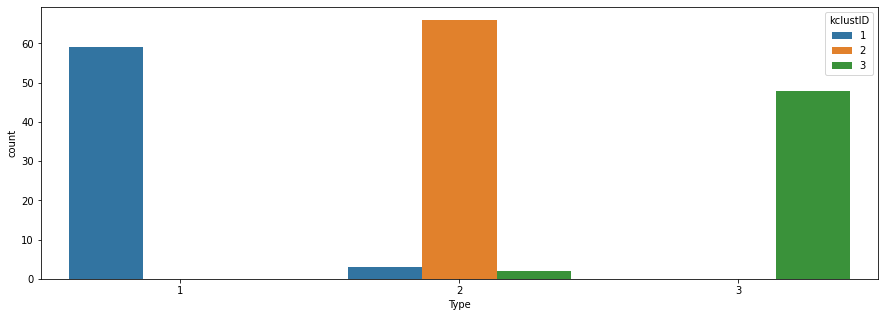

THE MISS-CLASSIFIED CLUSTERS
--------------------------


kclustID  Type      PCA1      PCA2      PCA3
73          1     2  2.562227 -0.260199  3.374394
83          3     2 -2.538977  0.087443  0.474251
95          1     2  2.543865 -0.169274  0.788697
118         3     2 -2.433013  1.257141 -1.903027
121         1     2  1.336322 -0.253337  5.345388

In [25]:
# plot to compare the orignal Custers under 'Type' and predicted clusters under 'kclustID'
# plt.figure(figsize=(15,5))
# sns.scatterplot(x=finalData.Type, y=finalData.kclustID, hue=finalData.Type)
# plt.title('Original Clusters v/s Predicted Clusters')
# plt.show()
plt.figure(figsize=(15,5))
sns.countplot(x=finalData.Type, hue=finalData.kclustID)
plt.show()
# Filter the data for mismatch in type and kclustID columns
print('\033[7mTHE MISS-CLASSIFIED CLUSTERS\033[0m')
print('--------------------------')
finalData[finalData.Type != finalData.kclustID]

**Both 'countplot' and 'scatterplot' clearly show that the original cluster 1 & 3 are correctly predicted using the PCA DATA. Only 5 records from cluster 2 are miss-classified as 1 or 3. Hence, we can conclude that PCA will help us reduce dimension without much loss of informations.**

# 3D plot in seaborn

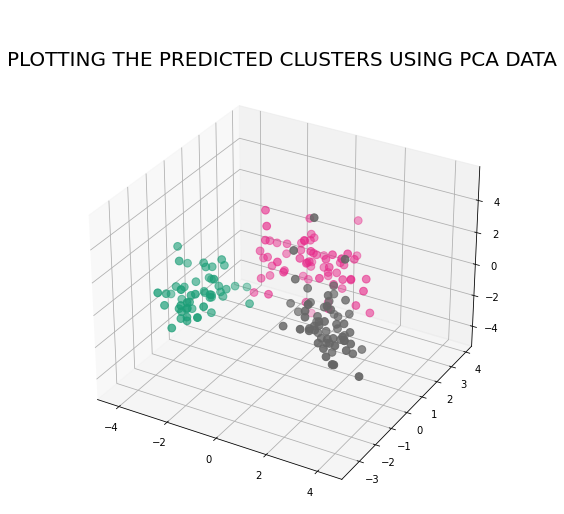

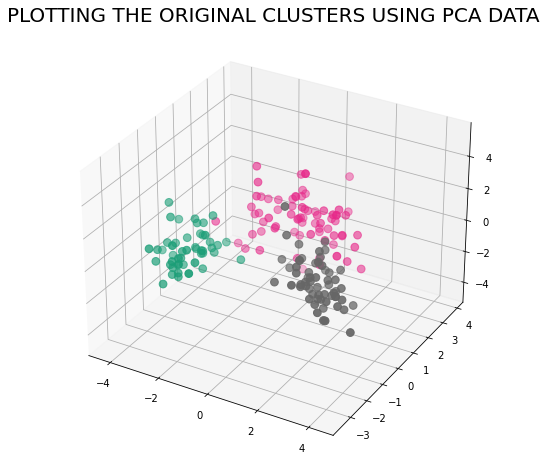

In [48]:
# import libraries
from mpl_toolkits.mplot3d import Axes3D

# 3D plot for predicted clusters
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalData.PCA1, finalData.PCA2, finalData.PCA3, c = finalData.kclustID, cmap='Dark2_r', s=60)
plt.title('\n\nPLOTTING THE PREDICTED CLUSTERS USING PCA DATA',fontsize = 20)
plt.show()
# 3D plot for orginal clusters
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(finalData.PCA1, finalData.PCA2, finalData.PCA3, c = finalData.Type, cmap='Dark2_r', s=60)
plt.title('PLOTTING THE ORIGINAL CLUSTERS USING PCA DATA',fontsize = 20)
plt.show()

**As we can see both these plots look very similar, except for few points in yellow cluster or cluster 2**

# Checking the Kmeans algorithm on original dataset

In [27]:
# Initialize and train the predict the clusters
km = KMeans(n_clusters=3,random_state=0)
Kclust = pd.DataFrame(km.fit_predict(normData),columns=['Kclust'])

# Concat the predicted vlaues in the dataframe
temp = pd.concat([Kclust,finalData],axis=1)

### Mapping the predicted cluster to actual clusters

In [28]:
temp1 = temp.copy()
temp1.loc[(temp1.Kclust == 0), 'Kclust' ] = 3
temp1.loc[(temp1.Kclust == 1), 'Kclust' ] = 4
temp1.loc[(temp1.Kclust == 2), 'Kclust' ] = 1
temp1.loc[(temp1.Kclust == 4), 'Kclust' ] = 2
temp1.loc[(temp1.Kclust == 1)].head()

Kclust  kclustID  Type      PCA1      PCA2      PCA3
0       1         1     1  3.316751 -1.443463 -0.165739
1       1         1     1  2.209465  0.333393 -2.026457
2       1         1     1  2.516740 -1.031151  0.982819
3       1         1     1  3.757066 -2.756372 -0.176192
4       1         1     1  1.008908 -0.869831  2.026688

In [29]:
print('\n * \033[7m Mapping the Predicted Clusters to Actual Clusters \033[0m')
temp1.groupby(['Type','Kclust']).count()


 *  Mapping the Predicted Clusters to Actual Clusters 


kclustID  PCA1  PCA2  PCA3
Type Kclust                            
1    1             59    59    59    59
2    1              2     2     2     2
     2             66    66    66    66
     3              3     3     3     3
3    3             48    48    48    48

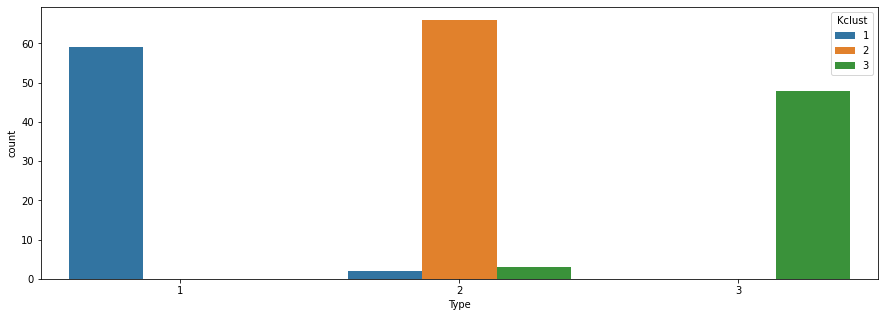

THE MISS-CLASSIFIED CLUSTERS
--------------------------


Kclust  kclustID  Type      PCA1      PCA2      PCA3
61        3         2     2 -1.836250  0.829984 -1.605702
73        1         1     2  2.562227 -0.260199  3.374394
83        3         3     2 -2.538977  0.087443  0.474251
95        1         1     2  2.543865 -0.169274  0.788697
118       3         3     2 -2.433013  1.257141 -1.903027

In [30]:
# plot to compare the orignal Custers under 'Type' and predicted clusters under 'kclustID'
plt.figure(figsize=(15,5))
sns.countplot(x=temp1.Type, hue=temp1.Kclust)
plt.show()
# Filter the data for mismatch in type and kclustID columns
print('\033[7mTHE MISS-CLASSIFIED CLUSTERS\033[0m')
print('--------------------------')
temp1[temp1.Type != temp1.Kclust]

# Final Comments

**`PCA`** : 
* By applying the PCA technique we reduced the no of features from 13 to just 3. However, we lost about 33% information from the data. But when we apply the clustering techniques on the PCA data the accuracy is good. Even though we lost 33% of information our error is 9 for hirachical clustering and 5 for Kmeans out of 178 records, which is good in my opinion.

* The data here is not very good as we have seen from the `"pairplot"` and the `"KDEplot"` there is lot of overlap in the data. There is no single feature or features together which can help us distinguish the clusters. 

* Even if we use the entire data without apply PCA we still make 5 Erroneous prediction. Hence we conclude that by Applying PCA we don't lose significant information, which may impact prediction in some way. In fact the performance is same as before.

**Hirarchical vs Kmean Algorithms**
* Kmeans performs better than Hirarchical algorithm as the number of erroneous predictions are less for Kmeans.

# TSNE

In [31]:
from sklearn.manifold import TSNE

In [54]:
tsne_data = TSNE(n_components=2).fit_transform(normData)

In [55]:
pd.DataFrame(tsne_data)

0         1
0   -11.809307  3.647438
1    -7.792302  4.160870
2    -9.915233  7.938695
3   -12.482247  6.530413
4    -5.904885  9.080459
..         ...       ...
173  13.676508 -4.252299
174  12.950833 -5.615249
175  11.784472 -7.079862
176  12.139503 -6.946048
177  14.358375 -5.733614

[178 rows x 2 columns]

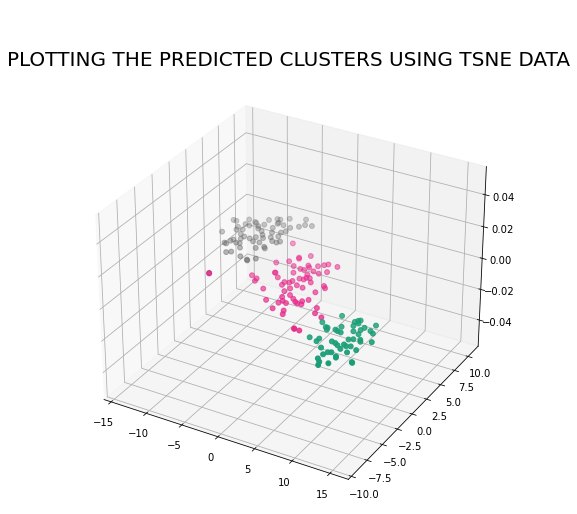

In [62]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:,0], tsne_data[:,1],  c = finalData.kclustID, cmap='Dark2_r', s=24)
plt.title('\n\nPLOTTING THE PREDICTED CLUSTERS USING TSNE DATA',fontsize = 20)
plt.show()

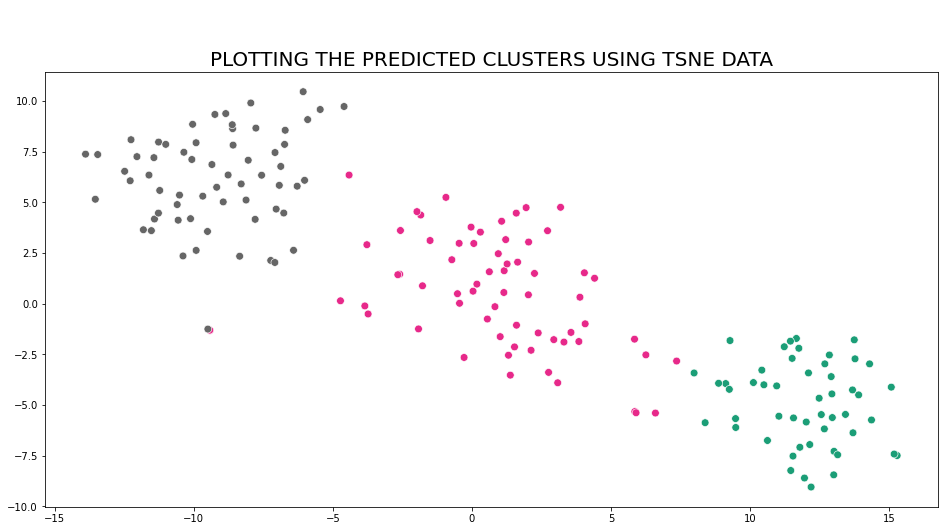

In [65]:
plt.figure(figsize = (16,8))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1],  c = finalData.kclustID, cmap='Dark2_r', s=60)
plt.title('\n\nPLOTTING THE PREDICTED CLUSTERS USING TSNE DATA',fontsize = 20)
plt.show()

In [67]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_data,colorlist=finalData.Type.to_numpy())
plt.show()